In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import random

In [2]:
# Get project files
!wget https://raw.githubusercontent.com/bryanherdianto/data-science-mini-projects/main/fruits-classification/fruits.zip

!unzip fruits.zip

# Variables for pre-processing
batch_size = 128
IMG_HEIGHT = 100
IMG_WIDTH = 100

# Define paths
dataset_dir = 'fruits'
train_dir = 'train'
validation_dir = 'validation'

fruits = [
    'Watermelon', 'Tomato', 'Strawberry', 'Raspberry', 'Potato Red', 'Pomegranate', 'Plum',
    'Pineapple', 'Pepper Red', 'Pepper Green', 'Pear', 'Peach', 'Passion Fruit', 'Papaya', 'Orange',
    'Onion White', 'Mango', 'Limes', 'Lemon', 'Kiwi', 'Grape Blue', 'Cucumber Ripe', 'Corn', 'Clementine',
    'Cherry', 'Cantaloupe', 'Cactus fruit', 'Blueberry', 'Banana', 'Avocado', 'Apricot', 'Apple Granny Smith',
    'Apple Braeburn'
]

# Create training and validation directories
for category in fruits:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

# Split ratio
train_ratio = 0.8
validation_ratio = 0.2

# Function to split and move files
def split_data(category):
    category_path = os.path.join(dataset_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)

    total_images = len(images)
    train_size = int(total_images * train_ratio)

    train_images = images[:train_size]
    validation_images = images[train_size:]

    for image in train_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(train_dir, category, image)
        shutil.copy(src, dst)

    for image in validation_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(validation_dir, category, image)
        shutil.copy(src, dst)

# Split the data for each category
for category in fruits:
    split_data(category)

print("Data splitting complete.")

# Get number of files in each directory. The train and validation directories each have the subdirectories of different fruit names.
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])

print(total_train)
print(total_val)

Streaming output truncated to the last 5000 lines.
  inflating: fruits/Pepper Green/Pepper Green_275.jpg  
  inflating: fruits/Pepper Green/Pepper Green_276.jpg  
  inflating: fruits/Pepper Green/Pepper Green_277.jpg  
  inflating: fruits/Pepper Green/Pepper Green_278.jpg  
  inflating: fruits/Pepper Green/Pepper Green_279.jpg  
  inflating: fruits/Pepper Green/Pepper Green_28.jpg  
  inflating: fruits/Pepper Green/Pepper Green_280.jpg  
  inflating: fruits/Pepper Green/Pepper Green_281.jpg  
  inflating: fruits/Pepper Green/Pepper Green_282.jpg  
  inflating: fruits/Pepper Green/Pepper Green_283.jpg  
  inflating: fruits/Pepper Green/Pepper Green_284.jpg  
  inflating: fruits/Pepper Green/Pepper Green_285.jpg  
  inflating: fruits/Pepper Green/Pepper Green_286.jpg  
  inflating: fruits/Pepper Green/Pepper Green_287.jpg  
  inflating: fruits/Pepper Green/Pepper Green_288.jpg  
  inflating: fruits/Pepper Green/Pepper Green_289.jpg  
  inflating: fruits/Pepper Green/Pepper Green_29.jpg  

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

Found 13471 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.


In [4]:
# Print class distribution in training set
print(train_data_gen.class_indices)
train_class_counts = train_data_gen.classes
print(np.bincount(train_class_counts))

# Print class distribution in validation set
print(val_data_gen.class_indices)
val_class_counts = val_data_gen.classes
print(np.bincount(val_class_counts))

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
[393 393 393 341 392 369 392 393 393 392 360 313 787 372 393 392 392 350
 383 393 392 393 556 355 532 392 357 393 360 392 393 590 380]
{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion F

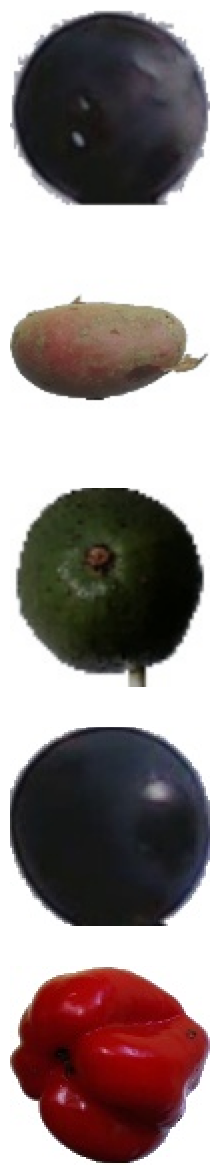

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [6]:
train_image_generator = ImageDataGenerator(
    horizontal_flip = True,
    rescale=1./255,
    shear_range=0.1,
    rotation_range=20,
    width_shift_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.1],
    channel_shift_range=0.05,
    fill_mode='nearest'
)
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

Found 13471 images belonging to 33 classes.


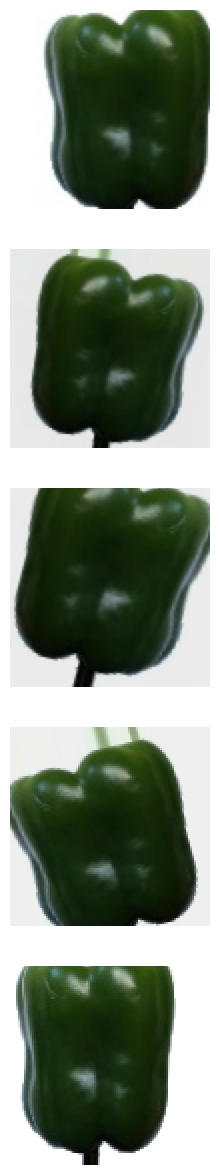

In [7]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.92):
            print("\nReached 92% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = MyCallback()

# Number of classes
num_classes = 33

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0

In [10]:
# Variables for training
epochs = 20

tf.keras.backend.clear_session()

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    verbose=2,
    validation_steps=total_val//batch_size,
    callbacks=[callbacks]
)

Epoch 1/20
105/105 - 58s - loss: 0.2807 - accuracy: 0.9095 - val_loss: 0.0897 - val_accuracy: 0.9745 - 58s/epoch - 550ms/step
Epoch 2/20

Reached 92% accuracy so cancelling training!
105/105 - 54s - loss: 0.1143 - accuracy: 0.9629 - val_loss: 0.1529 - val_accuracy: 0.9444 - 54s/epoch - 516ms/step


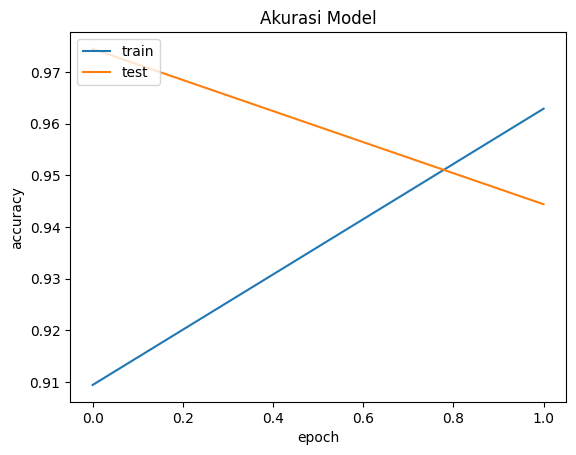

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

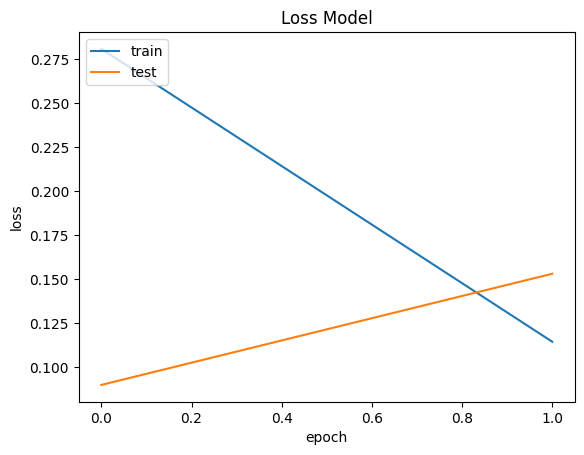

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving Apple Granny Smith_73.jpg to Apple Granny Smith_73.jpg
{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
1/1 [==============================] - 0s 414ms/step
Predicted class: Apple Granny Smith


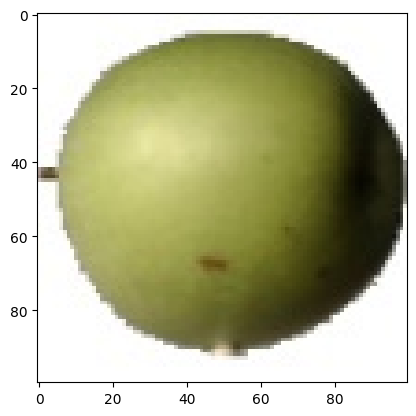

In [13]:
# Upload files
fil = files.upload()

# Print class indices
print(train_data_gen.class_indices)

# Predict for each uploaded file
for fn in fil.keys():
    path = fn
    img = image.load_img(path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale the image

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    # Get the class with the highest probability
    predicted_class_index = np.argmax(classes[0])

    # Get the class label from the index
    class_labels = list(train_data_gen.class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]

    print(f"Predicted class: {predicted_class_label}")

In [12]:
# Save the model in TF-Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved in TF-Lite format.")

Model saved in TF-Lite format.
